In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1번 문제: Probability Mass function(PMF)

{'Space': 1, 'Reality': 2, 'Mind': 3, 'Time': 4, 'Power': 5, 'Soul': 6}


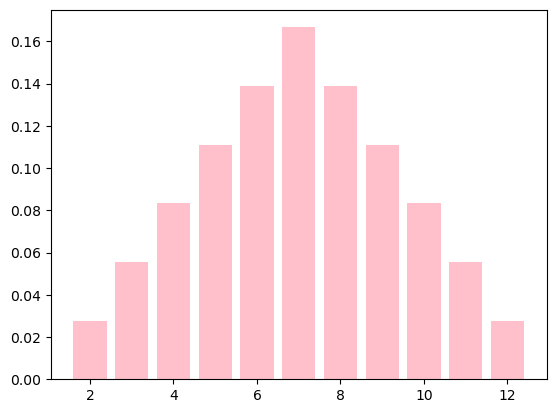

In [9]:
stones = ['Space', 'Reality', 'Mind', 'Time', 'Power', 'Soul']
stones_scores = dict(zip(stones, range(1, 7))) # {'Space': 1, 'Reality': 2, 'Mind': 3, 'Time': 4, 'Power': 5, 'Soul': 6}
print(stones_scores)
# print(stones_scores[])

### start ###
score = [ 0 for _ in  range(13) ]
# print(score)

for i in stones:
    for j in stones:
        score[stones_scores[i] + stones_scores[j]] += 1

sum = 0
x = []
y = []
for i in range(len(score)):
    sum += score[i]
    if score[i] != 0:
        x.append(i)

for i in x:
    y.append(score[i]/sum)

plt.bar(x,y, color = 'pink')
plt.show()


### 2번 문제: PMF estimation

In [187]:
def gen_data(func): # 입력된 PMF를 기반으로 data를 생성하는 함수
    num_data=10000
    x= np.linspace(0,99,100)

    # func의 argument는 수정 가능
    p = func(x)

    error= 1-np.sum(p)
    if error<0.1 and error >= 0:
        p+=error/len(p)
    else:
        print("error:",error," p의 총합이 1이 안됩니다.")
        return -100

    g_data = np.random.choice(x,num_data,p=p,replace=True)
    # print(g_data)
    return g_data

def test(data, func):
    error=0
    test_num = 1000
    for i in range(test_num):
        error += np.mean(np.abs(np.sort(data)-np.sort(gen_data(func))))

    print("error:",error/test_num)
    return

[52. 57. 36. ... 40. 61. 40.]


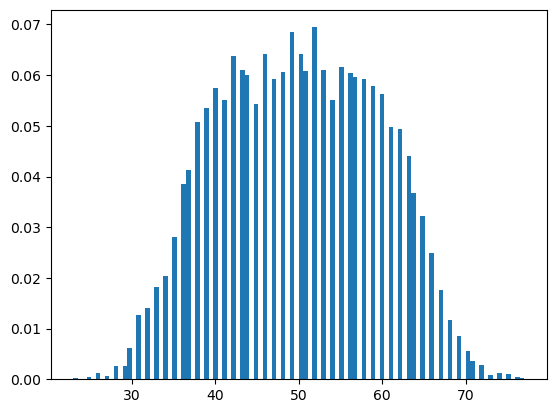

In [191]:
data = np.load("data.npy")
print(data)
_ = plt.hist(data, 100, density=True)


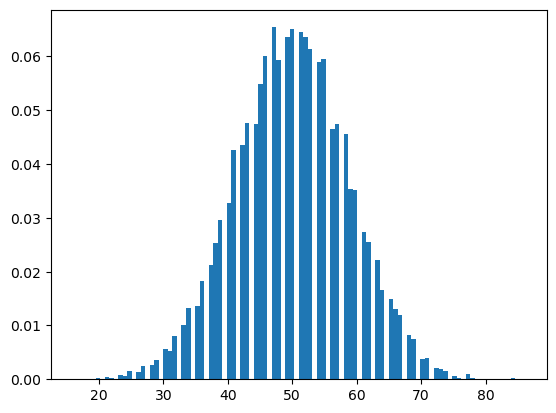

In [219]:
import math
def com(a, b):
    top = a
    bottom = b
    if b == 0:
        return 1
    elif b == 1:
        return a
    while(b > 1):
        top = top * (a - 1)
        bottom = bottom * (b - 1)
        b -= 1
        a -= 1
    return top / bottom
        # print("top = ", top)
    # print("bottom = ", bottom)

def func(x):
    a = [0] * 100
    for i in range(300, 400):
        a[i - 300] = com(300, i) * ( (1 / 2) ** i ) * ( 1 / 2) ** ( 300 - i )
    return a

# def func(x):
#     a = [0] * 100
#     for i in range(53, 153):
#         # k = int(i / 2)
#         # print(i)
#         a[i- 53] = math.exp(-103) * (103 ** (i)) / math.factorial(i)
#     # print(a)
#     return a


my_data = gen_data(func)
_ = plt.hist(my_data, 100, density=True)

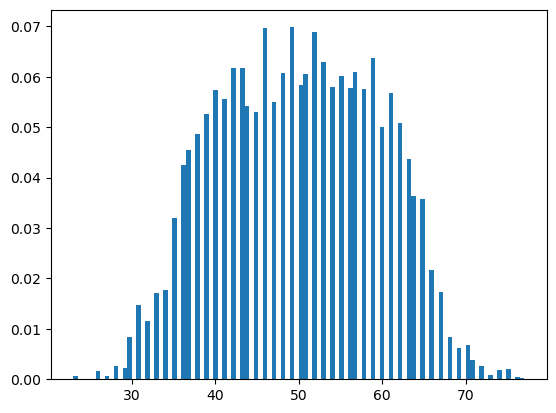

In [210]:
# count 기반으로 성공한 사례

def func(x):
    a = np.array([0] * 100)
    for i in data:
        a[int(i)] += 1
    a = a / len(data)
    return a

my_data = gen_data(func)
_ = plt.hist(my_data, 100, density=True)

In [220]:
test(data, func) # uniform

error: 1.1712664999999989
